In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt


cameras = [
    ["CAM02009CCTV7.jpg", "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", "Port Matilda US-322 By-Pass Westbound",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", "Port Matilda I-99 Exit 61 Median",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg","Atherton and Valley Vista",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg","Atherton and Vairo",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg","Atherton and North Hills",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg","Atherton and Park",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg","Atherton and W.College",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg","Atherton and W.Beaver",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg","I-99/US-322 Interchange",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg","Benner Pike",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg","Grays Woods",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg","US-322 E/O PA-26",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg","I-99 at Exit 71 (Toftrees)",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg","Snowshoe I-80 Exit 147",41.022703,-77.933981],
    ["collegeTwp.jpg","College Township Traffic camera",40.811564,-77.830719],
    ["parkArboretum.jpg","PSU Park Ave.",40.804483,-77.864219]
    ]

In [2]:
camdir = "cams29_csvs"

for c in cameras:
    x = glob.glob(f"/home/ubuntu/nitelite/{camdir}/*vehicles*{c[0].split('.')[0]}*.csv")
    k = pd.read_csv(x[0])
    for i in range(0,len(x)): # 1
        x2 = pd.read_csv(x[i])
        k = pd.concat([k,x2])
    k['time'] =  pd.to_datetime(k['time'])
    k.to_csv(f"xfull_vehicles_{camdir}_{c[0].split('.')[0]}.csv",index=False)

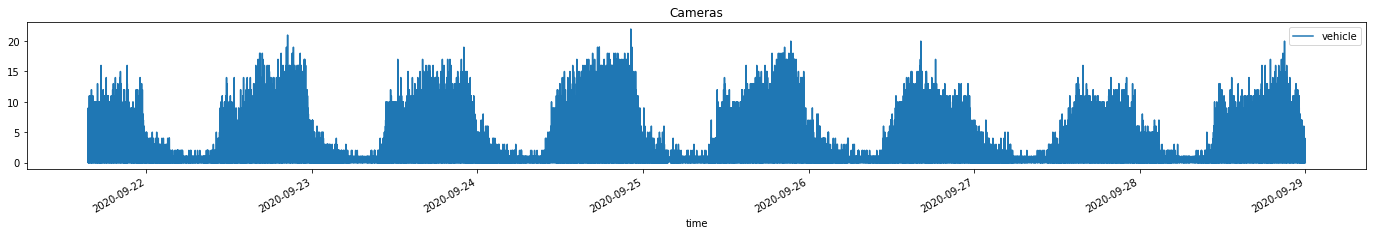

In [3]:

x = glob.glob(f"/home/ubuntu/nitelite/xfull_vehicles_{camdir}_*.csv")
k = pd.read_csv(x[0])
for i in range(0,len(x)): # 2
    x2 = pd.read_csv(x[i])
    k = pd.concat([k,x2])
k['time'] =  pd.to_datetime(k['time'])
k.to_csv(f"full_vehicles_{camdir}.csv",index=False)
ax = k.plot(x ='time', y='vehicle', kind = 'line',figsize=(24,3),title=f"Cameras")

In [4]:
k

,time,file,vehicle
0,2020-09-21 15:31:38,/home/ubuntu/cams29/parkArboretum/20200921/202...,0
1,2020-09-21 15:32:19,/home/ubuntu/cams29/parkArboretum/20200921/202...,1
2,2020-09-21 15:33:00,/home/ubuntu/cams29/parkArboretum/20200921/202...,0
3,2020-09-21 15:33:42,/home/ubuntu/cams29/parkArboretum/20200921/202...,1
4,2020-09-21 15:34:24,/home/ubuntu/cams29/parkArboretum/20200921/202...,2
...,...,...,...
13362,2020-09-28 08:55:28,/home/ubuntu/cams29/CAM02007CCTV13/20200928/20...,0
13363,2020-09-28 08:56:09,/home/ubuntu/cams29/CAM02007CCTV13/20200928/20...,0
13364,2020-09-28 08:57:29,/home/ubuntu/cams29/CAM02007CCTV13/20200928/20...,0
13365,2020-09-28 08:58:49,/home/ubuntu/cams29/CAM02007CCTV13/20200928/20...,0


In [5]:
dfcam = pd.read_csv(f"full_vehicles_{camdir}.csv")

dfcam['time'] =  pd.to_datetime(dfcam['time'])
dfcam = dfcam.sort_values(by='time')

dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
dfcam['datetime_EST'] = pd.to_datetime(dfcam['datetime_UTC']) - pd.Timedelta(hours=4)

In [6]:
dfcam

,datetime_UTC,image_file,vehicle_count,datetime_EST
252266,2020-09-21 15:31:20,/home/ubuntu/cams29/collegeTwp/20200921/202009...,5,2020-09-21 11:31:20
205917,2020-09-21 15:31:24,/home/ubuntu/cams29/CAM02028CCTV32/20200921/20...,3,2020-09-21 11:31:24
39400,2020-09-21 15:31:26,/home/ubuntu/cams29/CAM02037CCTV43/20200921/20...,5,2020-09-21 11:31:26
97767,2020-09-21 15:31:28,/home/ubuntu/cams29/CAM02038CCTV44/20200921/20...,2,2020-09-21 11:31:28
131547,2020-09-21 15:31:30,/home/ubuntu/cams29/CAM02039CCTV45/20200921/20...,2,2020-09-21 11:31:30
...,...,...,...,...
100848,2020-09-28 23:59:49,/home/ubuntu/cams29/CAM02006CCTV10/20200928/20...,0,2020-09-28 19:59:49
175277,2020-09-28 23:59:51,/home/ubuntu/cams29/CAM02033CCTV38/20200928/20...,0,2020-09-28 19:59:51
256393,2020-09-28 23:59:54,/home/ubuntu/cams29/collegeTwp/20200928/202009...,0,2020-09-28 19:59:54
215785,2020-09-28 23:59:57,/home/ubuntu/cams29/CAM02028CCTV32/20200928/20...,0,2020-09-28 19:59:57


In [7]:
dfcam.to_csv(f"dfull_vehicles_{camdir}_915-928-partial.csv",index=False)

In [8]:
full = pd.read_csv("full_vehicles_427-921-partial-all-cameras.csv")
#full = pd.read_csv("all_traffic_cameras_426-601.csv")

In [9]:
full

,datetime_UTC,image_file,vehicle_count,datetime_EST
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12
...,...,...,...,...
5282142,2020-09-21 15:30:01,/home/ubuntu/cams28/CAM02007CCTV13/20200921/20...,0,2020-09-21 11:30:01
5282143,2020-09-21 15:30:05,/home/ubuntu/cams28/CAM02009CCTV7/20200921/202...,0,2020-09-21 11:30:05
5282144,2020-09-21 15:30:11,/home/ubuntu/cams28/CAM02005CCTV9/20200921/202...,1,2020-09-21 11:30:11
5282145,2020-09-21 15:30:13,/home/ubuntu/cams28/CAM02006CCTV10/20200921/20...,0,2020-09-21 11:30:13


In [8]:
#full = pd.read_csv("full_vehicles_427-615-partial-all-cameras.csv")

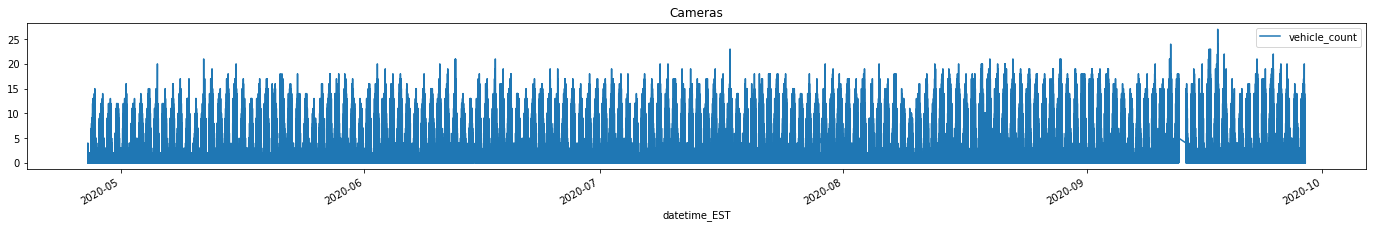

In [10]:
newfull = pd.concat([full,dfcam])
newfull['datetime_EST'] =  pd.to_datetime(newfull['datetime_EST'])
newfull = newfull.sort_values(by='datetime_EST')
ax = newfull.plot(x ='datetime_EST', y='vehicle_count', kind = 'line',figsize=(24,3),title=f"Cameras")

In [11]:
newfull.to_csv("full_vehicles_427-928-partial-all-cameras.csv",index=False)

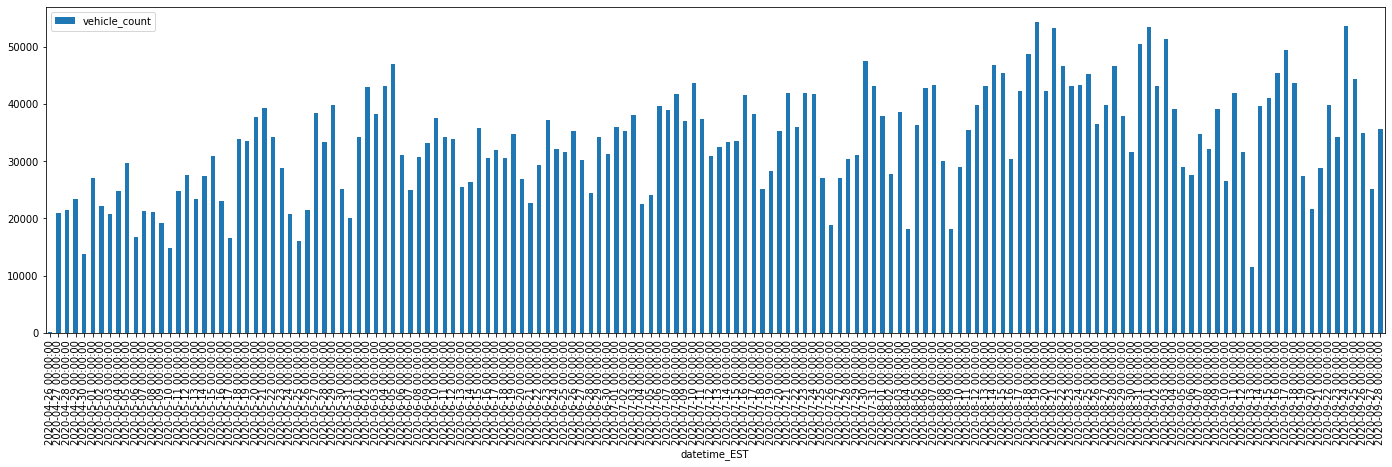

In [12]:
newfull.set_index('datetime_EST', drop=False, inplace=True)
newfull = newfull.set_index('datetime_EST').resample('D').sum().reset_index()
newfull.plot(x ='datetime_EST', y='vehicle_count', kind='bar',figsize=(24,6))
# this retains artificial bump on the benner pike